In [4]:
from matplotlib import pyplot as plt
from parse_logs import parse_siege_logs, read_log_file

In [41]:
log_file_path = './logs-paas/siege-d1-r1.log'
log_data = read_log_file(log_file_path)
results = parse_siege_logs(log_data)

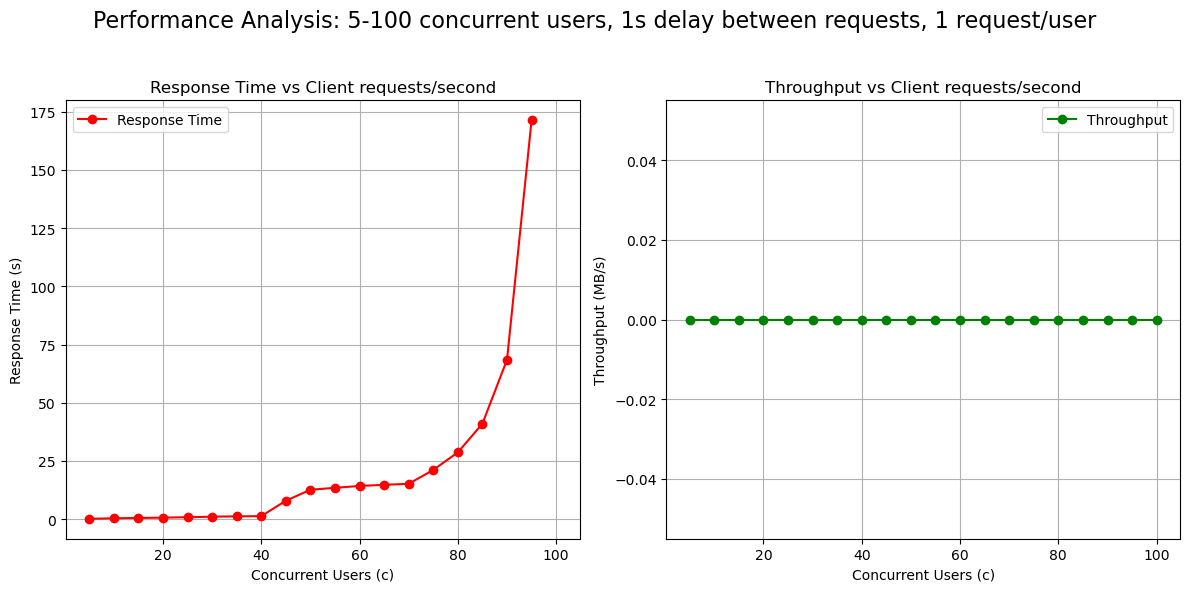

In [42]:
c_values = [res['c'] for res in results]
response_times = [res['response_time'] for res in results]
throughputs = [res['throughput'] for res in results]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

# Plot response time on the left
ax1.plot(c_values, response_times, 'r-o', label='Response Time')
ax1.set_title('Response Time vs Client requests/second')
ax1.set_xlabel('Concurrent Users (c)')
ax1.set_ylabel('Response Time (s)')
ax1.legend()
ax1.grid()

# Plot throughput on the right
ax2.plot(c_values, throughputs, 'g-o', label='Throughput')
ax2.set_title('Throughput vs Client requests/second')
ax2.set_xlabel('Concurrent Users (c)')
ax2.set_ylabel('Throughput (MB/s)')
ax2.legend()
ax2.grid()

fig.suptitle('Performance Analysis: 5-100 concurrent users, 1s delay between requests, 1 request/user', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [35]:
log_file_path = './logs-paas/with-credit/siege-d1-r5.log'
log_data = read_log_file(log_file_path)
results = parse_siege_logs(log_data)

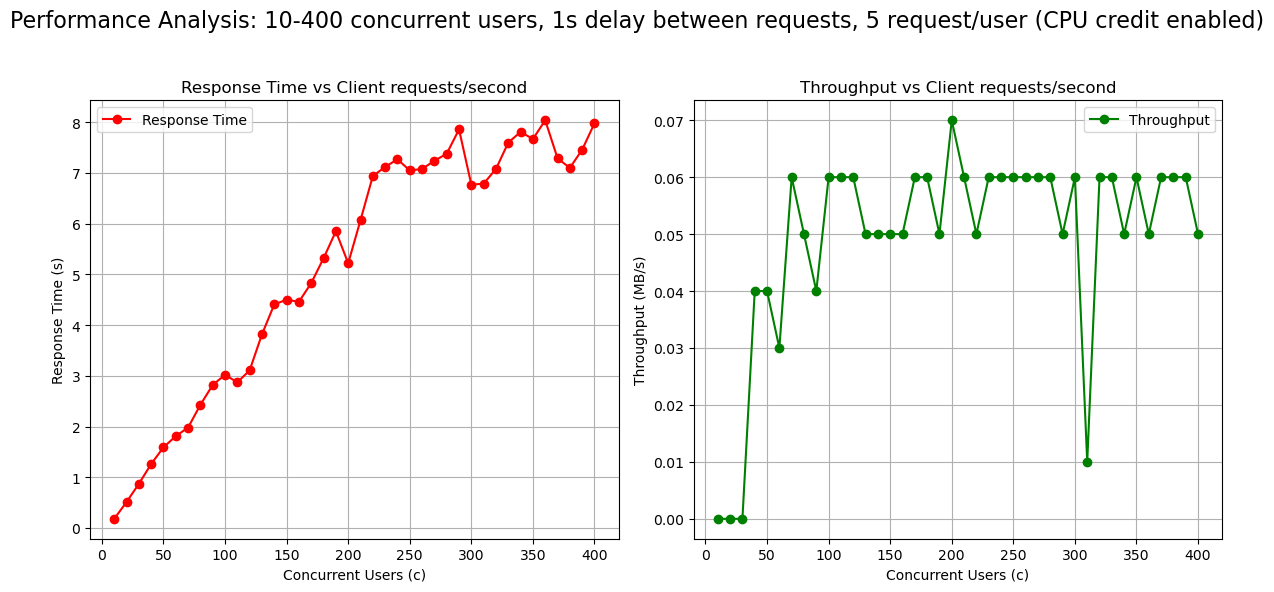

In [40]:
c_values = [res['c'] for res in results]
response_times = [res['response_time'] for res in results]
throughputs = [res['throughput'] for res in results]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

# Plot response time on the left
ax1.plot(c_values, response_times, 'r-o', label='Response Time')
ax1.set_title('Response Time vs Client requests/second')
ax1.set_xlabel('Concurrent Users (c)')
ax1.set_ylabel('Response Time (s)')
ax1.legend()
ax1.grid()

# Plot throughput on the right
ax2.plot(c_values, throughputs, 'g-o', label='Throughput')
ax2.set_title('Throughput vs Client requests/second')
ax2.set_xlabel('Concurrent Users (c)')
ax2.set_ylabel('Throughput (MB/s)')
ax2.legend()
ax2.grid()

fig.suptitle('Performance Analysis: 10-400 concurrent users, 1s delay between requests, 5 request/user (CPU credit enabled)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()